<a href="https://colab.research.google.com/github/AndresInsuasty/tesis-cafes-especiales/blob/main/utils/Crear_Imagenes_objetivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook para crear imagenes etiqueta
Objetivo: construir imagenes de segmentado a partir de las etiquetas de labelme convertidas a txt
¿porqué se convirtieron las etiquetas a txt? -> para facilitar la lectura de las coordenadas de la región a etiquetar o realizar mascara


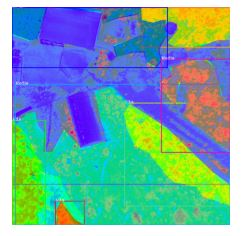

## Librerias

In [1]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from glob import glob
import time



## Variables de ambiente

In [2]:
PATH_ETIQUETAS =  '/content/drive/MyDrive/segmentado/etiquetas_txt/' # path de etiquetas a leer
IMAGE_SIZE = 800 # Tamaño de la imagen a crear, es imagen cuadrada
COLOR_BAJA = (255,0,0)
COLOR_MEDIA = (0,255,0)
COLOR_ALTA = (0,0,255)

## Creando imagen base

In [3]:
def crear_imgbase(IMAGE_SIZE=800):
    return np.zeros((IMAGE_SIZE,IMAGE_SIZE,3),np.uint8)

# Crear imagen de salida

In [5]:
def crear_imgseg(coordenadas,color,img_base):
    #crear una imagen base
    pts = coordenadas.reshape((-1,1,2))
    salida = cv2.fillPoly(img_base, [pts], color)
    return salida

## Lectura de etiquetas en txt

In [8]:
def leer_etiqueta(txt):
    # se lee un archivo txt y se deja en una variable string el contenido del archivo
    f = open (txt,'r')
    mensaje = f.read()
    f.close()
    return mensaje

## Listado de los archivos txt

In [6]:
def lstxt(path, filtro="*.txt"):
    #Genera la lista de todos los archivos de formato txt que se encuentren en la ruta path
    spath=path + filtro
    return glob(spath)  

## Crear regiones poligonales, unir en unica imagen y guardar

In [15]:
def union_seg(prueba_etiqueta):
    # Guarda una imagen con las regiones segmentadas por colores

    # lee el archivo txt proporcionado en la entrada de la función
    a = leer_etiqueta(prueba_etiqueta)

    # es string! asi que parte por cada salto de linea
    regiones = a.split('\n')

    # se crea una imagen en negro que servirá como base
    img_base = crear_imgbase()

    # para cada una de las regiones encontradas en el archivo txt
    for r in regiones:
        if r!='':
            l_c = r.split(',')
            et = l_c[-1]
            l_c = l_c[:-1]
            lc = [float(i) for i in l_c]
            b = list(map(list, zip(lc[::2], lc[1::2])))
            b = np.array(b,np.int32)
            if et == 'Alta':
                cr = COLOR_ALTA
            elif et == 'Media':
                cr = COLOR_MEDIA
            elif et == 'Baja':
                cr = COLOR_BAJA
            else:
                cr=(100,100,100)
            crear_imgseg(b,cr,img_base)
    #se cambia el nombre de la carpeta para guardar las imagenes generadas        
    nombre_salida = prueba_etiqueta.replace('etiquetas_txt','imagenes_segmentadas')
    nombre_salida = nombre_salida.replace('.txt','.jpg')
    cv2.imwrite(nombre_salida, img_base)

## Ejecución de algoritmo

In [17]:
#listar archivos txt
etiquetas = lstxt(PATH_ETIQUETAS)

# Generar imagenes segmentadas y guardar
for etiqueta in etiquetas:
    union_seg(etiqueta)